### Example getting GOES/XRS15 microflare data

Note: several ways of doing and plotting this. The following works but there be more "optimal" ways.

Other resources: [Sunpy doc on getting/plotting XRS](https://docs.sunpy.org/en/stable/generated/gallery/acquiring_data/goes_xrs_example.html#sphx-glr-generated-gallery-acquiring-data-goes-xrs-example-py).

* 08-02-2022   IGH
*
---

In [1]:
#  Import in the usual stuff
import glob
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

from sunpy import timeseries as ts
from sunpy.net import Fido
from sunpy.net import attrs as a

In [2]:
#  Here just assuming it save to your sunpy/data dir but can of course change
outdir='/Users/iain/sunpy/data/'

In [3]:
# Search for the data with Fido
trange=a.Time("2012-10-05 21:20","2012-10-05 21:40")
rg15 = Fido.search(trange, a.Instrument("XRS"), a.goes.SatelliteNumber(15))
print(rg15)

Results from 1 Provider:

1 Results from the XRSClient:
Source: https://umbra.nascom.nasa.gov/goes/fits

       Start Time               End Time        Instrument ... Source Provider
----------------------- ----------------------- ---------- ... ------ --------
2012-10-05 00:00:00.000 2012-10-05 23:59:59.999        XRS ...   GOES     NOAA




In [4]:
# Get the file from Fido - can obviously skip this step if already downloaded
# By default downloads to your sunpy/data directory
fg15 = Fido.fetch(rg15,path=outdir)

# GOES data are daily data files, so if timerange crosses 00:00 will get more than one file

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

sci_gxrs-l2-irrad_g15_d20121005_v0-0-0.nc:   0%|          | 0.00/747k [00:00<?, ?B/s]

In [5]:
#  If already downloaded can skip above step and just load back in
fg15=glob.glob(outdir+'sci_gxrs-l2-irrad_g15_d20121005_v0-0-0.nc')
print(fg15)
g15 = ts.TimeSeries(fg15, concatenate=True)

['/Users/iain/sunpy/data/sci_gxrs-l2-irrad_g15_d20121005_v0-0-0.nc']


In [6]:
# As GOES files are daily need to truncate timeseries to just time interested in
tg15=g15.truncate(trange.start.iso,trange.end.iso)

In [7]:
# Extract the info from the timeseries class
tg_tims=tg15.index
tg_x05=tg15.quantity("xrsa").value
tg_x18=tg15.quantity("xrsb").value

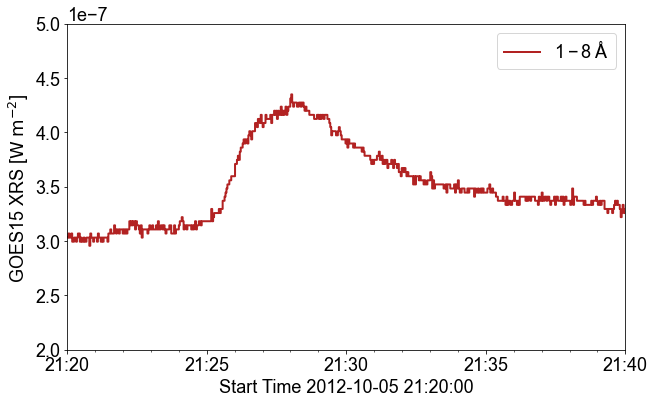

In [8]:
# And now do a more manual plot of this truncated data
# Some extra lines to make it look nicer, particularly in the time labelling

plt.rcParams.update({'font.size': 18,'font.family':"sans-serif",\
                         'font.sans-serif':"Arial",'mathtext.default':"regular"})

fig,ax = plt.subplots(figsize=(10, 6))
plt.plot(tg_tims,tg_x18,drawstyle='steps-post',marker=None,color='firebrick',lw=2,label='$1-8\;\AA$')
ax.set_ylabel("GOES15 XRS [$\mathrm{W\;m^{-2}}$] ")
ax.set_xlabel("Start Time "+trange.start.iso[:-4])
ax.set_ylim([2e-7,5e-7])
ax.set_xlim([trange.start.datetime,trange.end.datetime])
# precisely control the x time labels
myFmt = matplotlib.dates.DateFormatter('%H:%M')
majorx= matplotlib.dates.MinuteLocator(interval=5)
minorx= matplotlib.dates.MinuteLocator(interval=1)
ax.xaxis.set_major_locator(majorx)
ax.xaxis.set_minor_locator(minorx)
ax.xaxis.set_major_formatter(myFmt)
plt.legend()
plt.show()

In [9]:
# Work out the flare GOES class
# From about plot it's in the B-range as in the 1e-7 Wm^-2
print("GOES Class: B{0:.1f}".format(1e7*max(tg_x18)))

# Work out pre-flare background and subtract
btrange=a.Time("2012-10-05 21:20","2012-10-05 21:24")
btg15=g15.truncate(btrange.start.iso,btrange.end.iso)
meanb18=np.mean(btg15.quantity("xrsb").value)
print("GOES Back Sub Class: B{0:.1f}".format(1e7*(max(tg_x18)-meanb18)))

GOES Class: B4.3
GOES Back Sub Class: B1.3


---

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

sci_gxrs-l2-irrad_g15_d20121026_v0-0-0.nc:   0%|          | 0.00/772k [00:00<?, ?B/s]

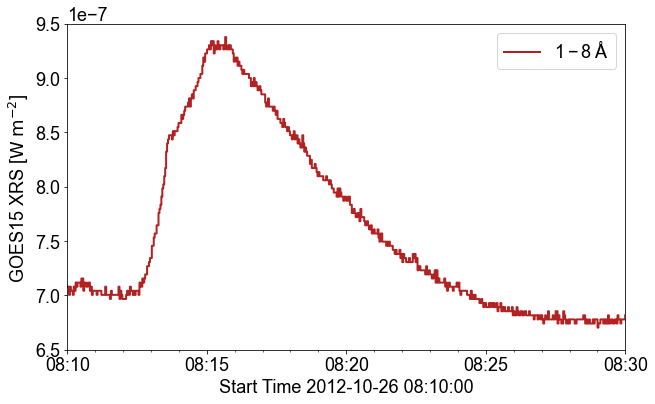

In [10]:
#  Repeat all of the above for another microflare
trange=a.Time("2012-10-26 08:10","2012-10-26 08:30")
rg15 = Fido.search(trange, a.Instrument("XRS"), a.goes.SatelliteNumber(15))
fg15 = Fido.fetch(rg15,path=outdir)
fg15=glob.glob(outdir+'sci_gxrs-l2-irrad_g15_d20121026_v0-0-0.nc')
g15 = ts.TimeSeries(fg15, concatenate=True)
tg15=g15.truncate(trange.start.iso,trange.end.iso)
tg_tims=tg15.index
tg_x05=tg15.quantity("xrsa").value
tg_x18=tg15.quantity("xrsb").value

fig,ax = plt.subplots(figsize=(10, 6))
plt.plot(tg_tims,tg_x18,drawstyle='steps-post',marker=None,color='firebrick',lw=2,label='$1-8\;\AA$')
ax.set_ylabel("GOES15 XRS [$\mathrm{W\;m^{-2}}$] ")
ax.set_xlabel("Start Time "+trange.start.iso[:-4])
ax.set_ylim([6.5e-7,9.5e-7])
ax.set_xlim([trange.start.datetime,trange.end.datetime])
myFmt = matplotlib.dates.DateFormatter('%H:%M')
majorx= matplotlib.dates.MinuteLocator(interval=5)
minorx= matplotlib.dates.MinuteLocator(interval=1)
ax.xaxis.set_major_locator(majorx)
ax.xaxis.set_minor_locator(minorx)
ax.xaxis.set_major_formatter(myFmt)
plt.legend()
plt.show()

In [11]:
print("GOES Class: B{0:.1f}".format(1e7*max(tg_x18)))
btrange=a.Time("2012-10-26 08:10","2012-10-26 08:12")
btg15=g15.truncate(btrange.start.iso,btrange.end.iso)
meanb18=np.mean(btg15.quantity("xrsb").value)
print("GOES Back Sub Class: B{0:.1f}".format(1e7*(max(tg_x18)-meanb18)))

GOES Class: B9.4
GOES Back Sub Class: B2.3
